In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp_stats

plt.rcParams['svg.fonttype'] = 'none'

In [2]:
df = pd.read_csv('constructs_df.csv', index_col = 0)

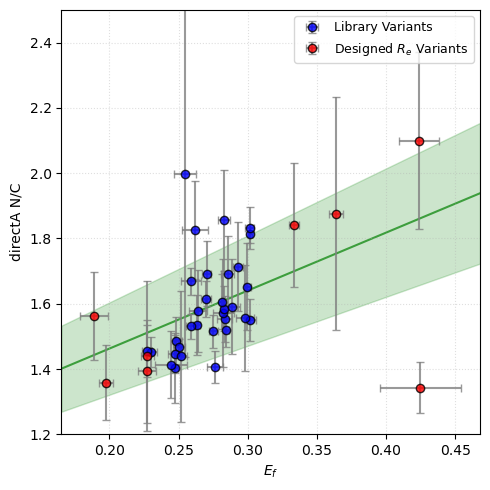

In [3]:
# plot Ef_cell vs directA_N/C with error bars
mask = df[['Ef_cell', 'Ef_cell_std', 'directA_N/C', 'directA_N/C_std']].notnull().all(axis=1)
plot_df = df.loc[mask]

x = plot_df['Ef_cell']
y = plot_df['directA_N/C']
xerr = plot_df['Ef_cell_std']
yerr = plot_df['directA_N/C_std']

# Create color array based on construct number
colors = ['red' if construct >= 35 and construct <= 42 else 'blue' for construct in plot_df['construct']]

fig, ax = plt.subplots(figsize=(5, 5))

# Plot points with separate calls for legend
blue_plotted = False
red_plotted = False
for i, (xi, yi, xerri, yerri, color) in enumerate(zip(x, y, xerr, yerr, colors)):
    label = None
    if color == 'blue' and not blue_plotted:
        label = 'Library Variants'
        blue_plotted = True
    elif color == 'red' and not red_plotted:
        label = 'Designed $R_e$ Variants'
        red_plotted = True
    
    ax.errorbar(xi, yi, xerr=xerri, yerr=yerri, fmt='o', color=color, 
                markeredgecolor='black', markeredgewidth=1,
                ecolor='grey', capsize=3, alpha=0.8, label=label)

# Linear regression for line of best fit
slope, intercept, r_value, p_value, std_err = sp_stats.linregress(x, y)

# Get x-axis limits to extend line to full width
x_limits = ax.get_xlim()
line_x = np.array(x_limits)
line_y = slope * line_x + intercept

# Plot line of best fit
ax.plot(line_x, line_y, color='green', linestyle='-', linewidth=1.5, alpha=0.7, zorder=1)

# Calculate 95% confidence interval using prediction interval
n = len(x)
dof = n - 2  # degrees of freedom
t_val = sp_stats.t.ppf(0.975, dof)  # 95% confidence interval

# Calculate standard error of prediction
x_mean = np.mean(x)
sxx = np.sum((x - x_mean)**2)
predict_y = slope * x + intercept
residuals = y - predict_y
s_resid = np.sqrt(np.sum(residuals**2) / dof)

# Prediction interval (wider at extremes)
se_line = s_resid * np.sqrt(1/n + (line_x - x_mean)**2 / sxx)
margin = t_val * se_line

# Shade prediction interval
ax.fill_between(line_x, line_y - margin, line_y + margin, 
                color='green', alpha=0.2, zorder=0)

ax.set_xlabel('$E_{f}$')
ax.set_ylabel('directA N/C')
ax.grid(True, linestyle=':', alpha=0.4)

# Add legend to top right
ax.legend(loc='upper right', frameon=True, fontsize=9)

plt.xlim(x_limits[0], x_limits[1])
plt.ylim(1.2, 2.5)
plt.tight_layout()
plt.savefig('Figure_graphs/Fig3/Ef_vs_loc.svg')

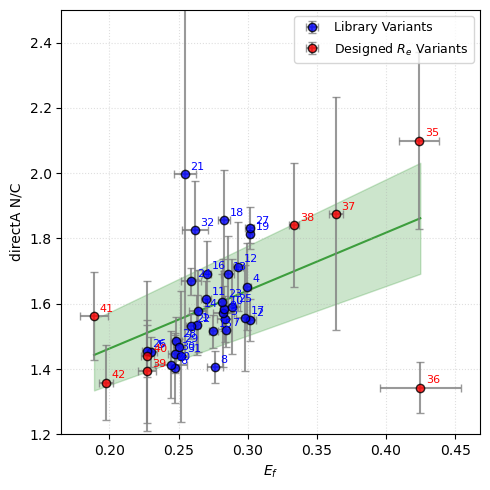

In [4]:
# plot Ef_cell vs directA_N/C with error bars
mask = df[['Ef_cell', 'Ef_cell_std', 'directA_N/C', 'directA_N/C_std']].notnull().all(axis=1)
plot_df = df.loc[mask]

x = plot_df['Ef_cell']
y = plot_df['directA_N/C']
xerr = plot_df['Ef_cell_std']
yerr = plot_df['directA_N/C_std']

# Create color array based on construct number
colors = ['red' if construct >= 35 and construct <= 42 else 'blue' for construct in plot_df['construct']]

fig, ax = plt.subplots(figsize=(5, 5))

# Plot points with separate calls for legend
blue_plotted = False
red_plotted = False
for i, (xi, yi, xerri, yerri, color) in enumerate(zip(x, y, xerr, yerr, colors)):
    label = None
    if color == 'blue' and not blue_plotted:
        label = 'Library Variants'
        blue_plotted = True
    elif color == 'red' and not red_plotted:
        label = 'Designed $R_e$ Variants'
        red_plotted = True
    
    ax.errorbar(xi, yi, xerr=xerri, yerr=yerri, fmt='o', color=color, 
                markeredgecolor='black', markeredgewidth=1,
                ecolor='grey', capsize=3, alpha=0.8, label=label)

# Linear regression for line of best fit
slope, intercept, r_value, p_value, std_err = sp_stats.linregress(x, y)
line_x = np.array([x.min(), x.max()])
line_y = slope * line_x + intercept

# Plot line of best fit
ax.plot(line_x, line_y, color='green', linestyle='-', linewidth=1.5, alpha=0.7, zorder=1)

# Calculate 95% confidence interval using prediction interval
n = len(x)
dof = n - 2  # degrees of freedom
t_val = sp_stats.t.ppf(0.975, dof)  # 95% confidence interval

# Calculate standard error of prediction
x_mean = np.mean(x)
sxx = np.sum((x - x_mean)**2)
predict_y = slope * x + intercept
residuals = y - predict_y
s_resid = np.sqrt(np.sum(residuals**2) / dof)

# Prediction interval (wider at extremes)
se_line = s_resid * np.sqrt(1/n + (line_x - x_mean)**2 / sxx)
margin = t_val * se_line

# Shade prediction interval
ax.fill_between(line_x, line_y - margin, line_y + margin, 
                color='green', alpha=0.2, zorder=0)

ax.set_xlabel('$E_{f}$')
ax.set_ylabel('directA N/C')
ax.grid(True, linestyle=':', alpha=0.4)

# Add legend to top right
ax.legend(loc='upper right', frameon=True, fontsize=9)

# Add construct labels
for _, row in plot_df.iterrows():
    color = 'red' if row['construct'] >= 35 and row['construct'] <= 42 else 'blue'
    ax.annotate(str(int(row['construct'])), (row['Ef_cell'], row['directA_N/C']), 
                xytext=(4, 3), textcoords='offset points', fontsize=8, color=color)

plt.ylim(1.2, 2.5)
plt.tight_layout()
#plt.savefig('Figure_graphs/Fig##/Ef_vs_loc.svg')

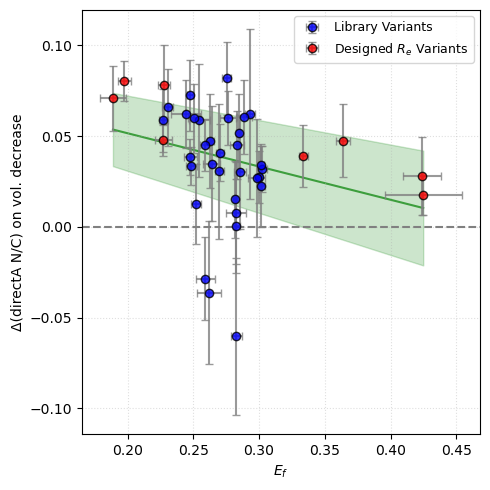

In [5]:
# plot Ef_cell vs directA_N/C_delta with error bars
mask = df[['Ef_cell', 'Ef_cell_std', 'directA_N/C_delta', 'directA_N/C_delta_std']].notnull().all(axis=1)
plot_df = df.loc[mask]

x = plot_df['Ef_cell']
y = plot_df['directA_N/C_delta']
xerr = plot_df['Ef_cell_std']
yerr = plot_df['directA_N/C_delta_std']

# Create color array based on construct number
colors = ['red' if construct >= 35 and construct <= 42 else 'blue' for construct in plot_df['construct']]

fig, ax = plt.subplots(figsize=(5, 5))

# Plot points with separate calls for legend
blue_plotted = False
red_plotted = False
for i, (xi, yi, xerri, yerri, color) in enumerate(zip(x, y, xerr, yerr, colors)):
    label = None
    if color == 'blue' and not blue_plotted:
        label = 'Library Variants'
        blue_plotted = True
    elif color == 'red' and not red_plotted:
        label = 'Designed $R_e$ Variants'
        red_plotted = True
    
    ax.errorbar(xi, yi, xerr=xerri, yerr=yerri, fmt='o', color=color, 
                markeredgecolor='black', markeredgewidth=1,
                ecolor='grey', capsize=3, alpha=0.8, label=label)

# Linear regression for line of best fit
slope, intercept, r_value, p_value, std_err = sp_stats.linregress(x, y)
line_x = np.array([x.min(), x.max()])
line_y = slope * line_x + intercept

# Plot line of best fit
ax.plot(line_x, line_y, color='green', linestyle='-', linewidth=1.5, alpha=0.7, zorder=1)

# Calculate 95% confidence interval using prediction interval
n = len(x)
dof = n - 2  # degrees of freedom
t_val = sp_stats.t.ppf(0.975, dof)  # 95% confidence interval

# Calculate standard error of prediction
x_mean = np.mean(x)
sxx = np.sum((x - x_mean)**2)
predict_y = slope * x + intercept
residuals = y - predict_y
s_resid = np.sqrt(np.sum(residuals**2) / dof)

# Prediction interval (wider at extremes)
se_line = s_resid * np.sqrt(1/n + (line_x - x_mean)**2 / sxx)
margin = t_val * se_line

# Shade prediction interval
ax.fill_between(line_x, line_y - margin, line_y + margin, 
                color='green', alpha=0.2, zorder=0)

ax.axhline(0, linestyle='--', color='gray')  # dashed horizontal line at y=0

ax.set_xlabel('$E_{f}$')
ax.set_ylabel('Δ(directA N/C) on vol. decrease')
ax.grid(True, linestyle=':', alpha=0.4)

# Add legend to top right
ax.legend(loc='upper right', frameon=True, fontsize=9)

plt.tight_layout()
plt.show()

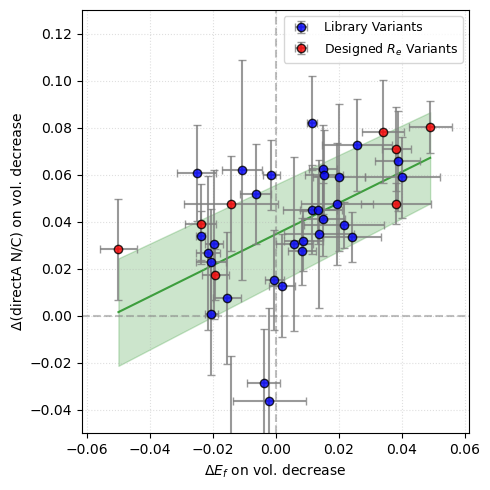

In [6]:
# plot Ef_cell_delta vs directA_N/C_delta with error bars
mask = df[['Ef_cell_delta', 'Ef_cell_delta_std', 'directA_N/C_delta', 'directA_N/C_delta_std']].notnull().all(axis=1)
plot_df = df.loc[mask]

x = plot_df['Ef_cell_delta']
y = plot_df['directA_N/C_delta']
xerr = plot_df['Ef_cell_delta_std']
yerr = plot_df['directA_N/C_delta_std']

# Create color array based on construct number
colors = ['red' if construct >= 35 and construct <= 42 else 'blue' for construct in plot_df['construct']]

fig, ax = plt.subplots(figsize=(5, 5))

# Plot points with separate calls for legend
blue_plotted = False
red_plotted = False
for i, (xi, yi, xerri, yerri, color) in enumerate(zip(x, y, xerr, yerr, colors)):
    label = None
    if color == 'blue' and not blue_plotted:
        label = 'Library Variants'
        blue_plotted = True
    elif color == 'red' and not red_plotted:
        label = 'Designed $R_e$ Variants'
        red_plotted = True
    
    ax.errorbar(xi, yi, xerr=xerri, yerr=yerri, fmt='o', color=color, 
                markeredgecolor='black', markeredgewidth=1,
                ecolor='grey', capsize=3, alpha=0.8, label=label)

# Linear regression for line of best fit
slope, intercept, r_value, p_value, std_err = sp_stats.linregress(x, y)
line_x = np.array([x.min(), x.max()])
line_y = slope * line_x + intercept

# Plot line of best fit
ax.plot(line_x, line_y, color='green', linestyle='-', linewidth=1.5, alpha=0.7, zorder=1)

# Calculate 95% confidence interval using prediction interval
n = len(x)
dof = n - 2  # degrees of freedom
t_val = sp_stats.t.ppf(0.975, dof)  # 95% confidence interval

# Calculate standard error of prediction
x_mean = np.mean(x)
sxx = np.sum((x - x_mean)**2)
predict_y = slope * x + intercept
residuals = y - predict_y
s_resid = np.sqrt(np.sum(residuals**2) / dof)

# Prediction interval (wider at extremes)
se_line = s_resid * np.sqrt(1/n + (line_x - x_mean)**2 / sxx)
margin = t_val * se_line

# Shade prediction interval
ax.fill_between(line_x, line_y - margin, line_y + margin, 
                color='green', alpha=0.2, zorder=0)

ax.axhline(0, linestyle='--', color='gray', alpha=0.5)  # dashed horizontal line at y=0
ax.axvline(0, linestyle='--', color='gray', alpha=0.5)  # dashed vertical line at x=0


ax.set_xlabel('Δ$E_{f}$ on vol. decrease')
ax.set_ylabel('Δ(directA N/C) on vol. decrease')
ax.grid(True, linestyle=':', alpha=0.4)

# Add legend to top right
ax.legend(loc='upper right', frameon=True, fontsize=9)

plt.ylim(-.05, .13)

plt.tight_layout()
plt.show()